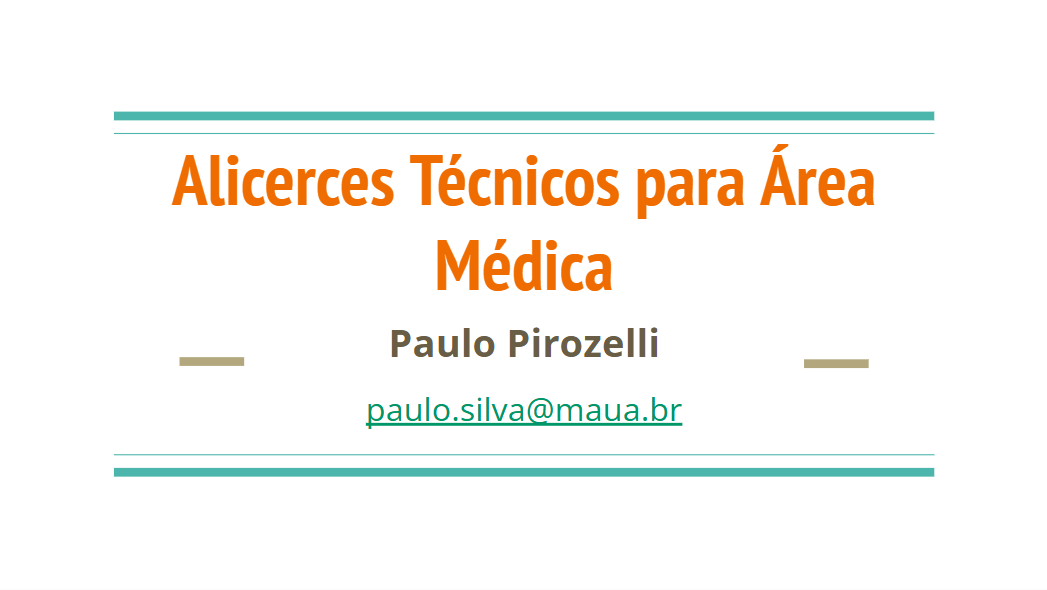

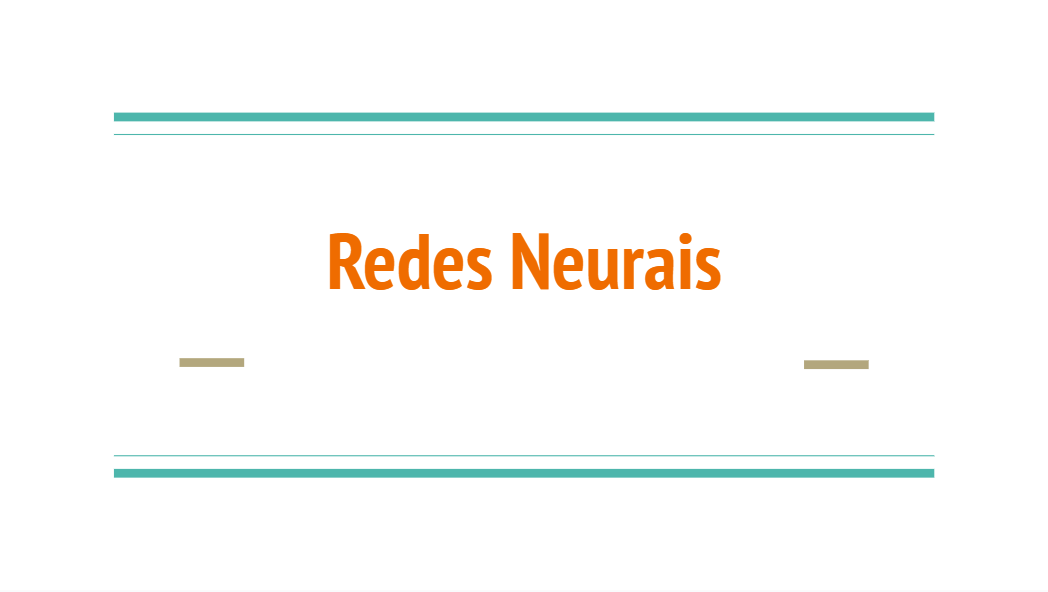

## Bibliotecas

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LayerNormalization
from tensorflow.keras.utils import to_categorical

## Treinamento

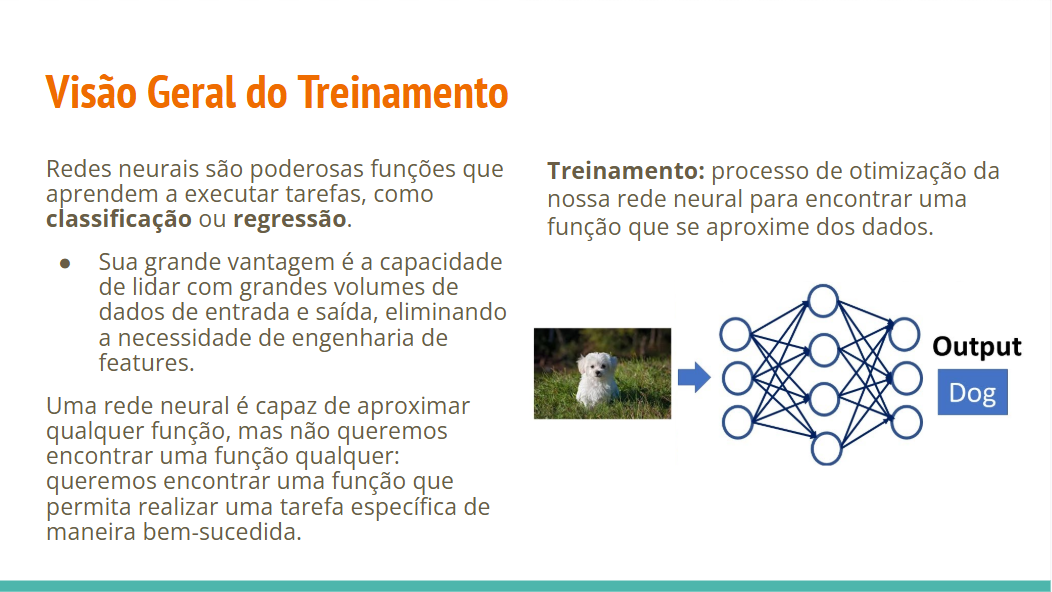

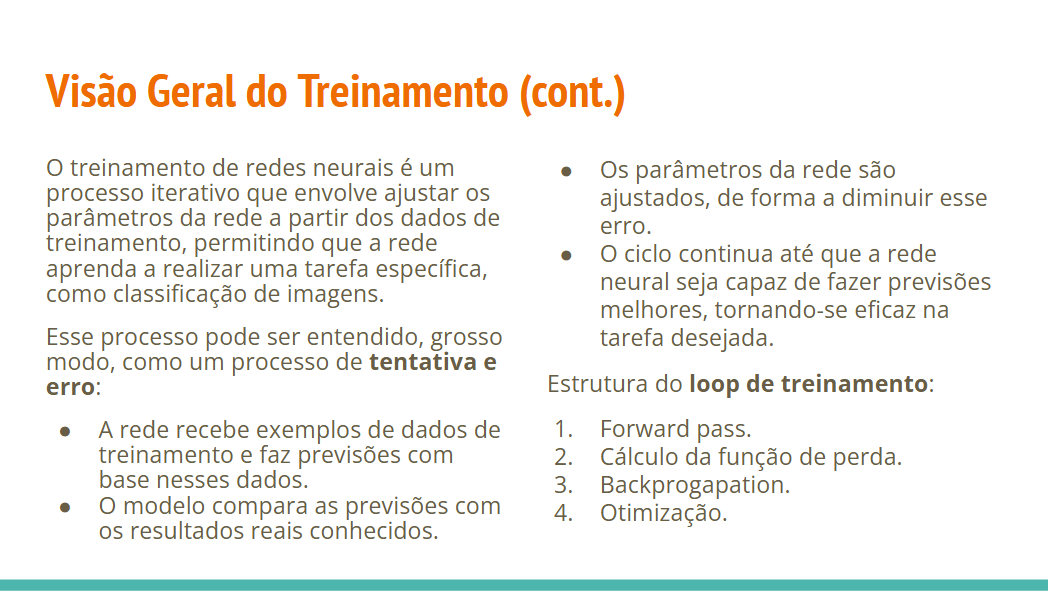

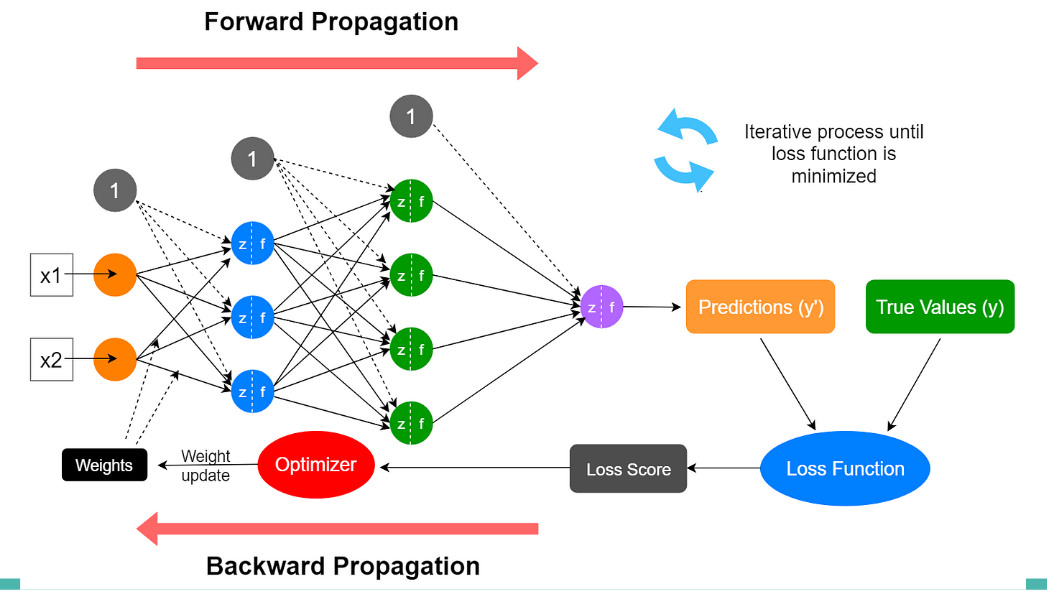

O ciclo de treinamento de uma rede neural fica claro quando usamos uma biblioteca de mais baixo nível, como o **PyTorch**.

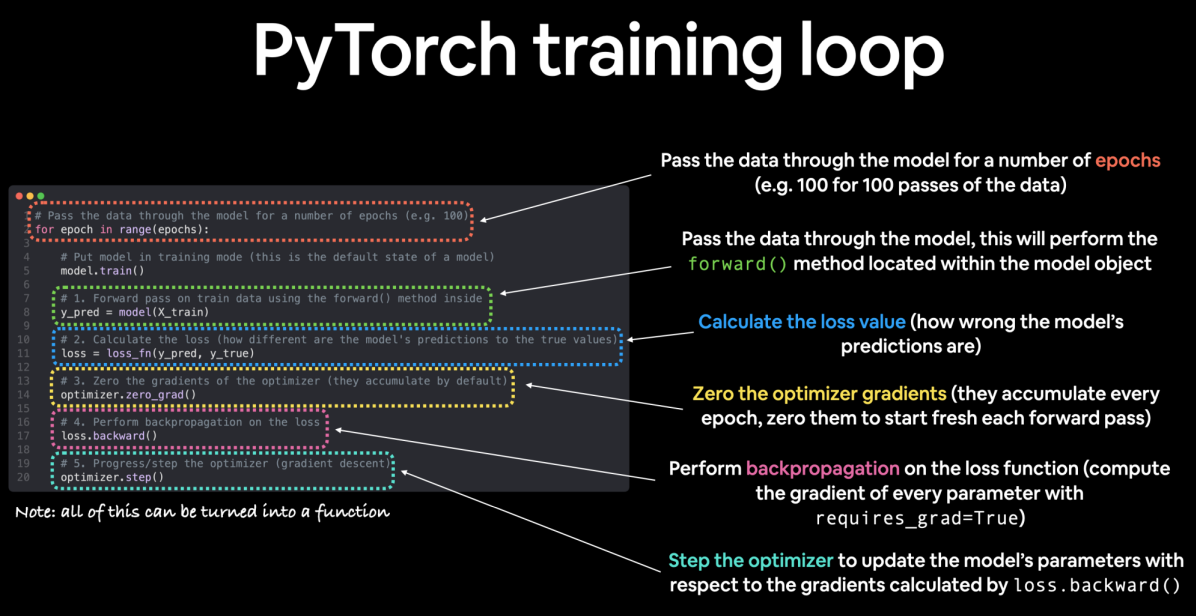

## Aplicação

Vamos trabalhar com o dataset **Breast Cancer Wisconsin**, de classificação. Esse conjunto de dados é composto por 569 amostras de tumores mamários, divididas em duas classes: benigno e maligno. Cada amostra possui 30 características numéricas relacionadas a propriedades físicas dos núcleos das células presentes em imagens digitalizadas, como textura, concavidade e simetria. O objetivo é treinar um modelo para prever se um tumor é benigno ou maligno com base nessas medidas.

In [ ]:
# Carregar o dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Shape do dataset:", X.shape)

Shape do dataset: (569, 30)


Para o pré-processamento, fazemos quatro coisas:


*   Divisão entre treino e teste
*   Normalização
*   Transformação em tensores




In [ ]:
# Dividir entre treino e teste
X_train_raw, X_test_raw, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizar com estatísticas do treino
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)  # apenas transform!

# Converter para tensores do PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1)

Outra coisa que precisamos, é construir a nossa rede neural.

In [ ]:
# Definir modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(30, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)

# Instanciar a rede
model = SimpleNN()

Definimos também uma função de perda e um otimizador.

In [ ]:
# Função de perda e otimizador
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Em seguida, fazemos o treinamento da rede.

In [ ]:
# Treinamento
for epoch in range(100):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Calcular acurácia no treino
    with torch.no_grad():
        predictions = torch.sigmoid(outputs)
        predicted_labels = (predictions >= 0.5).float()
        acc = (predicted_labels == y_train_tensor).float().mean()

    if epoch % 10 == 0:
      print(f'Época {epoch}, Loss: {loss.item():.4f}, Acurácia no treino: {acc:.4f}')

Época 0, Loss: 0.7517, Acurácia no treino: 0.3516
Época 10, Loss: 0.2494, Acurácia no treino: 0.9516
Época 20, Loss: 0.1184, Acurácia no treino: 0.9648
Época 30, Loss: 0.0825, Acurácia no treino: 0.9780
Época 40, Loss: 0.0682, Acurácia no treino: 0.9802
Época 50, Loss: 0.0596, Acurácia no treino: 0.9802
Época 60, Loss: 0.0533, Acurácia no treino: 0.9824
Época 70, Loss: 0.0481, Acurácia no treino: 0.9868
Época 80, Loss: 0.0434, Acurácia no treino: 0.9890
Época 90, Loss: 0.0392, Acurácia no treino: 0.9890


Por último, vamos avaliar o onsso modelo no conjunto teste.

In [ ]:
# Avaliação final no conjunto de teste
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_preds = torch.sigmoid(test_outputs)
    test_labels = (test_preds >= 0.5).float()
    test_acc = (test_labels == y_test_tensor).float().mean()

print(f'Loss: {test_loss.item():.4f}, Acurácia no teste: {test_acc:.4f}')

Loss: 0.0629, Acurácia no teste: 0.9825


Nosso modelo conseguiu acertar 96% das observações.

## Otimização

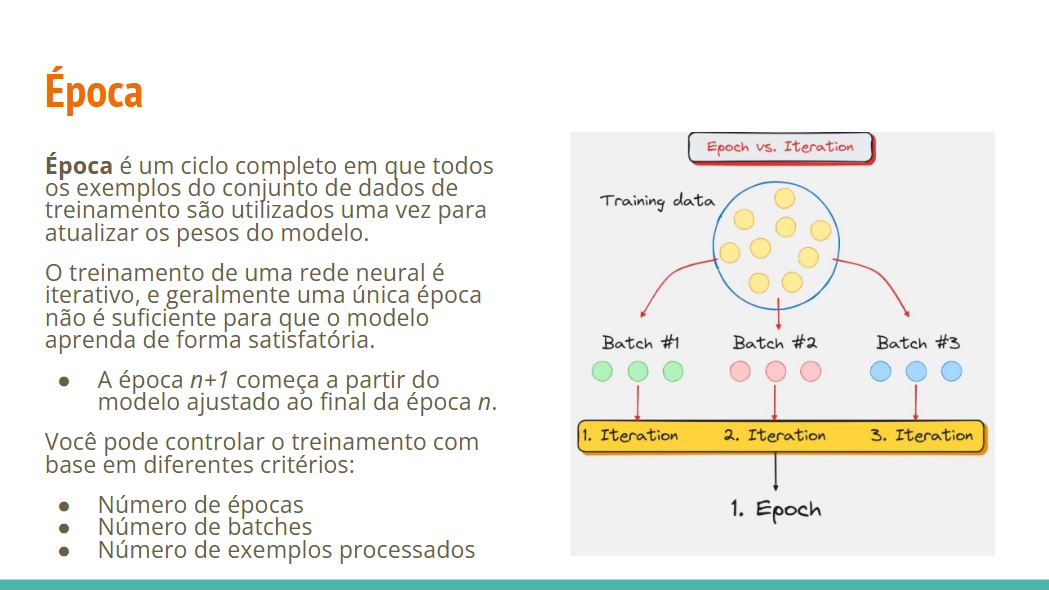

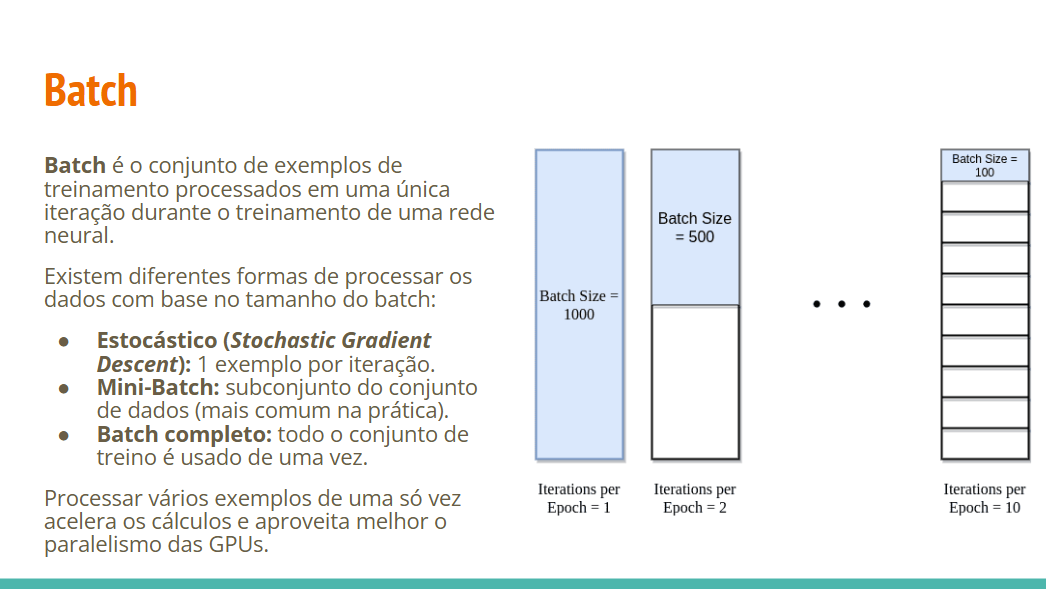

## Overfitting

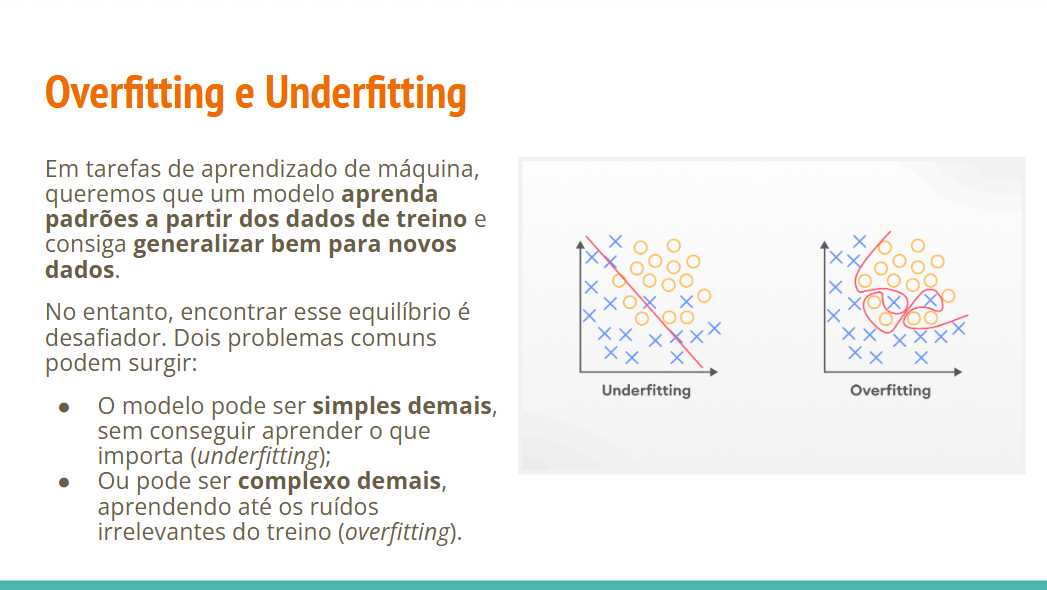

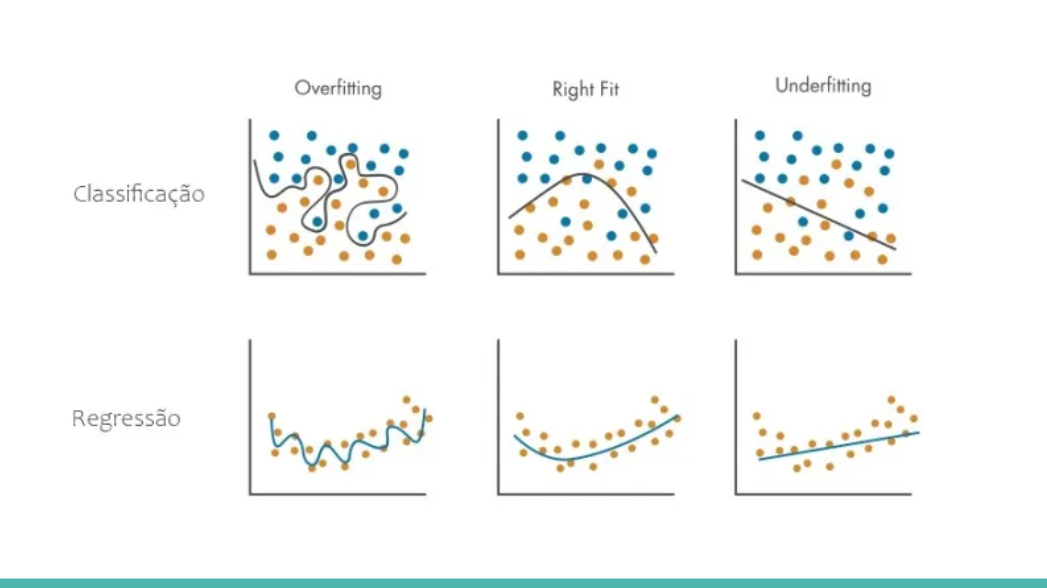

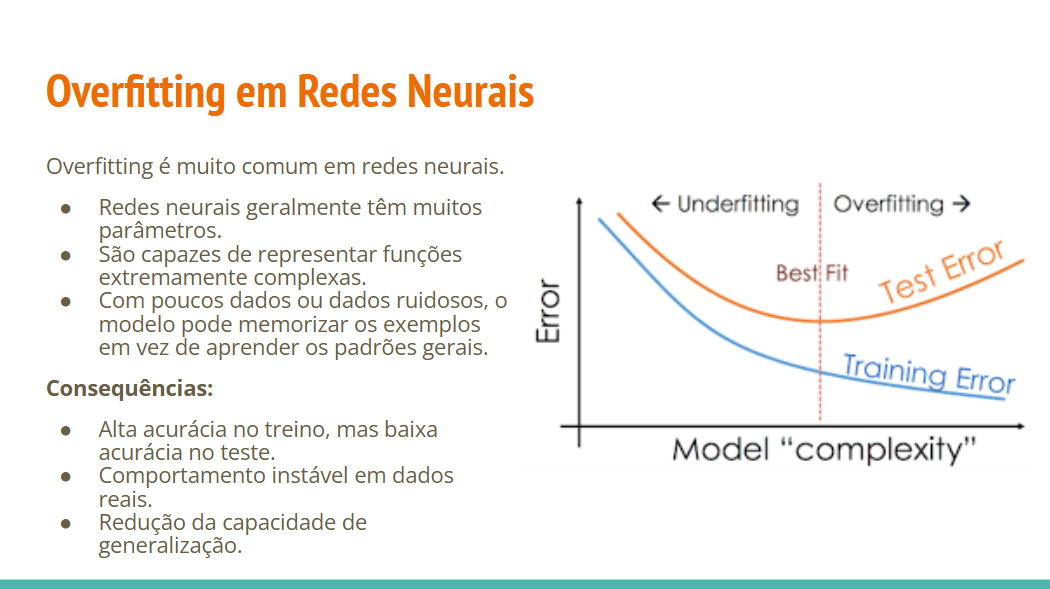

## Técnicas de Regularização

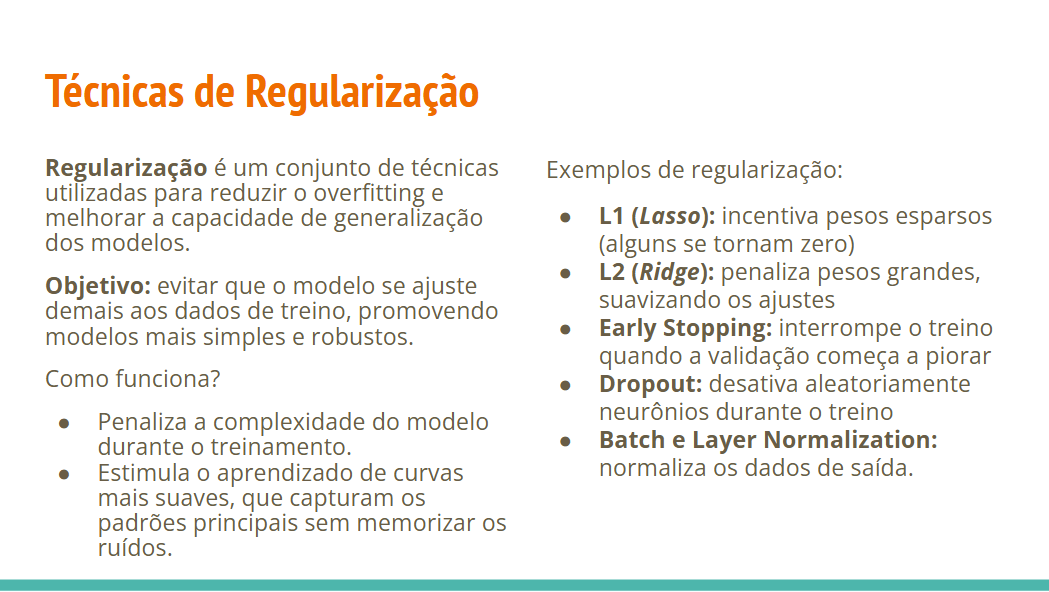

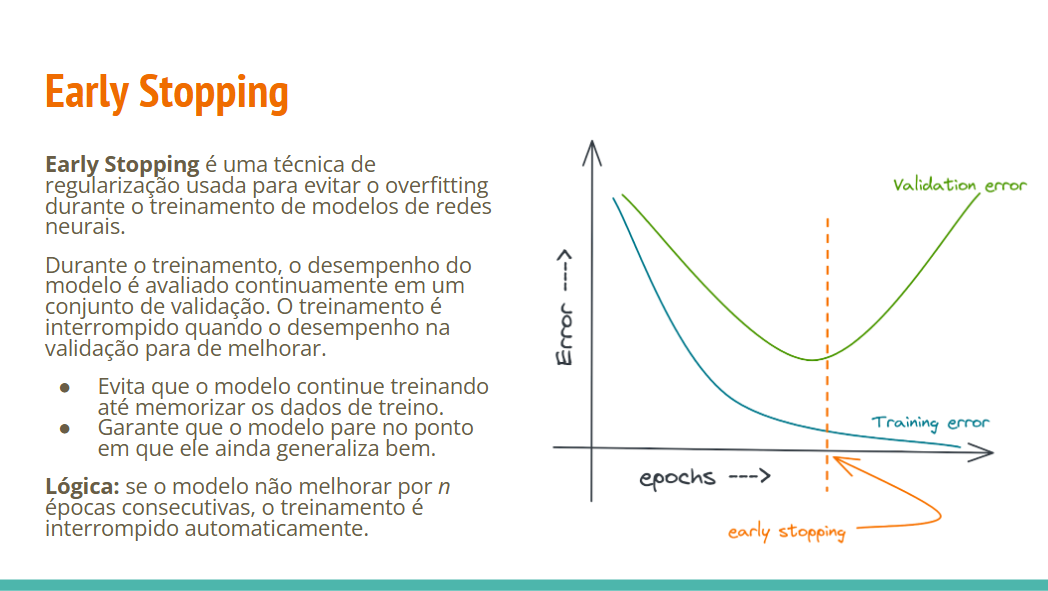

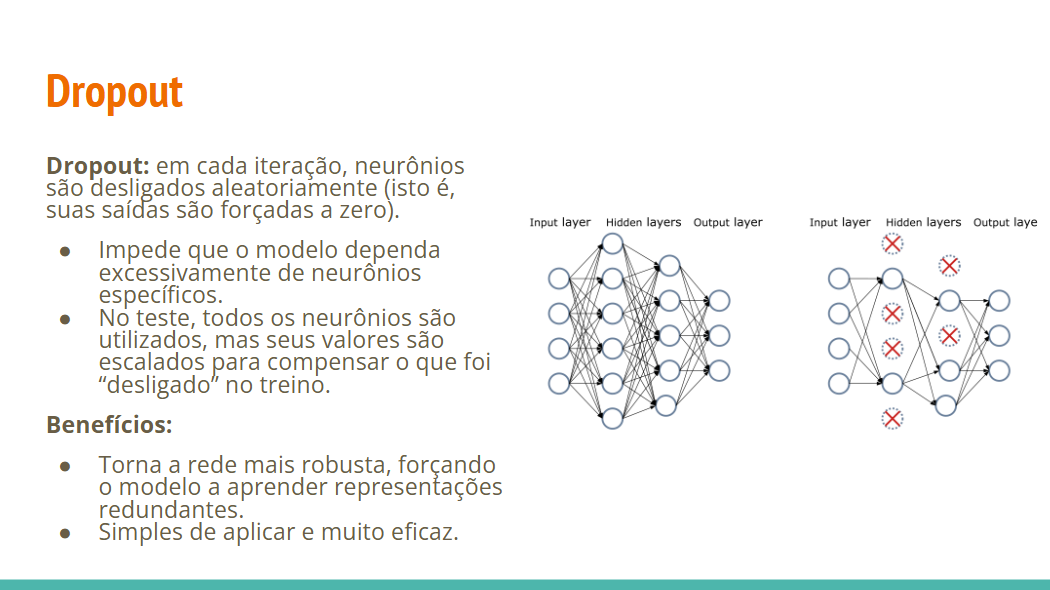

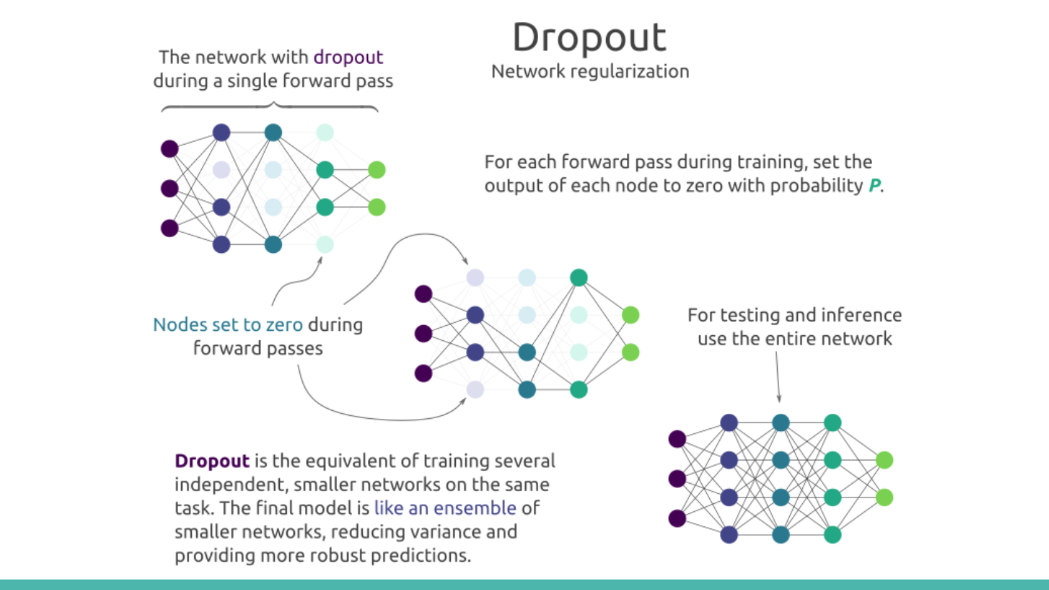

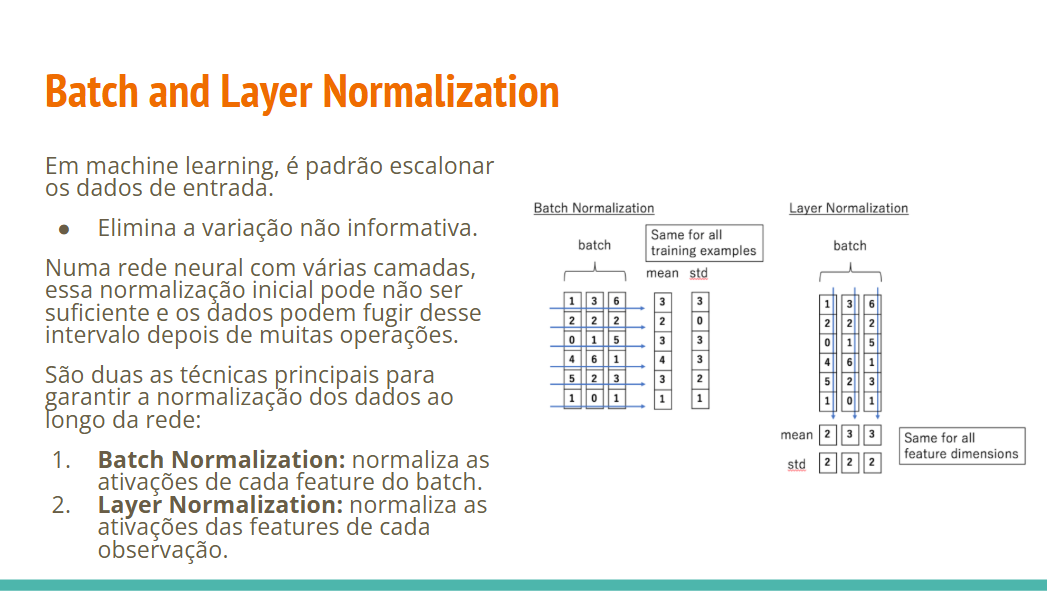

Abaixo, construímos uma rede neural que incorpora esses componentes de regularização.

In [ ]:
example_model = Sequential([

    Dense(512, activation='relu'),
    LayerNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    LayerNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    LayerNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

**Perguntas:**

* Qual a dimensionalidade dos dados de entrada?

* Qual a arquitetura dessa rede neural?

* Que tipo de tarefa ela resolve?

## Aplicação

O **MNIST** (Modified National Institute of Standards and Technology) é um dos datasets mais clássicos e amplamente utilizados em aprendizado de máquina e deep learning. Ele contém imagens de dígitos escritos à mão (de 0 a 9), com as seguintes características:

* 60.000 imagens para treinamento

* 10.000 imagens para teste

* Cada imagem tem dimensão 28x28 pixels em tons de cinza

* Cada amostra está associada a um rótulo que indica o dígito representado

Esse dataset é frequentemente utilizado como benchmark para testar modelos de classificação de imagens.

Vamos carregar os dados e visualizar as imagens.

In [ ]:
# Carrega os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


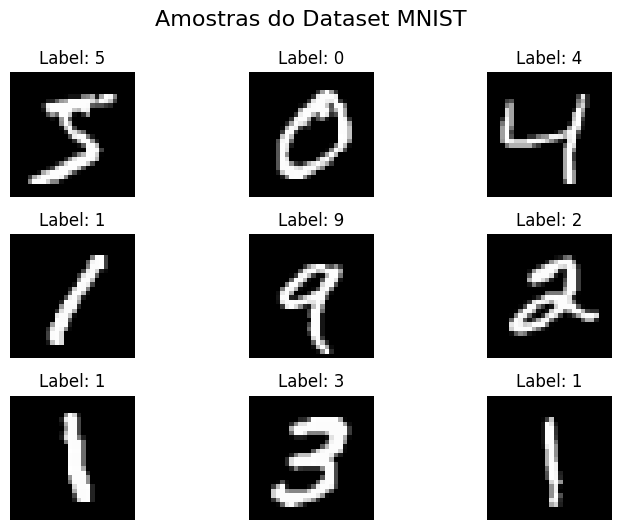

In [ ]:
# Define o número de imagens a mostrar
num_images = 9

# Cria a figura
plt.figure(figsize=(8, 5))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Amostras do Dataset MNIST', fontsize=16, y=1.05)
plt.show()

Sempre que trabalhamos com redes neurais, precisamos normalizar os dados de entrada. No caso, vamos fazer uma normalização min-max (0 a 1).

In [ ]:
# Normalizar os dados (0 a 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

Em seguida, precisamos transformar os rótulos. A função `to_categorical` do Keras transforma rótulos inteiros (integers) em vetores one-hot codificados. Isso é necessário quando usamos a função de perda `categorical_crossentropy`, que espera que os rótulos estejam nesse formato.

In [ ]:
# Codificar as saídas como one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Vamos agora criar um modelo simples para classificação de imagens.

Como podemos lidar com imagens bidimensionais? Até agora, nosso dados de entrada eram sempre vetores unidimensionais. Uma solução simples é **achatar** as imagens em um único vetor.

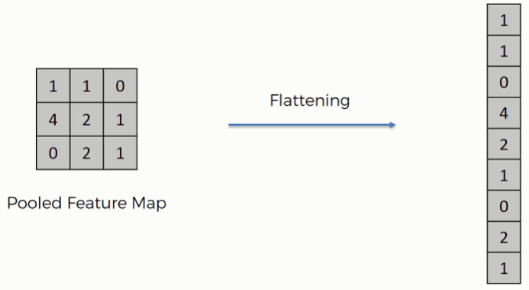

Vamos começar com uma rede extremamente simples:

* Recebe uma imagem 28x28;
* Transforma em um vetor de x dimensões;
* Faz uma operação linear, reduzindo para 10 dimensões;
* Aplica o softmax para gerar uma distribuição de probabilidade.

In [ ]:
# Criar o modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),  # camada que "achata" a imagem
    Dense(10, activation='softmax')  # 10 classes
])

Compilar um modelo em Keras é preparar o modelo para o treinamento, especificando três componentes principais:

* **Otimizador**

 * Define como os pesos do modelo serão ajustados com base no erro.

 * Exemplo: `adam` (adaptativo, eficiente e popular).

* **Função de perda**

 * Mede o erro entre a saída prevista e o rótulo real.

 * Exemplo: `categorical_crossentropy` para classificação com rótulos one-hot.

* **Métricas**

 * Indicam o desempenho do modelo durante o treino e teste.

 * Exemplo: `accuracy` para problemas de classificação.



In [ ]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Com isso, passamos para o treinamento do modelo.

In [ ]:
# Treinar o modelo
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7985 - loss: 0.7515 - val_accuracy: 0.9270 - val_loss: 0.2696
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9096 - loss: 0.3227 - val_accuracy: 0.9310 - val_loss: 0.2468
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9207 - loss: 0.2841 - val_accuracy: 0.9345 - val_loss: 0.2353
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.2800 - val_accuracy: 0.9348 - val_loss: 0.2330
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9242 - loss: 0.2748 - val_accuracy: 0.9357 - val_loss: 0.2305


Por último, fazemos a avaliação no conjunto teste.

In [ ]:
# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.3055
Acurácia no conjunto de teste: 0.9228


**Tarefa:** Procure melhorar o desempenho do modelo, até obter uma acurácia no conjunto teste acima de 98%.

## Exercício: Classificação de Imagens com no CIFAR-10

## Objetivo

Neste exercício, você irá construir uma **rede neural densa** utilizando **Keras** para classificar imagens do dataset **CIFAR-10**. Seu objetivo é treinar um modelo capaz de reconhecer corretamente o conteúdo de imagens em 10 categorias diferentes, como aviões, carros, gatos e cachorros.

---

## Sobre o Dataset

O **CIFAR-10** contém:

- **60.000 imagens coloridas** de tamanho 32x32 pixels
- **10 classes**: avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio e caminhão
- Divisão:
  - 50.000 imagens para **treinamento**
  - 10.000 imagens para **teste**

---

## Tarefas

Você deverá:

1. **Carregar** o dataset `CIFAR-10` a partir do módulo `keras.datasets`.
2. **Normalizar** os valores dos pixels para o intervalo [0, 1].
3. **Achatá-las** (usar `Flatten`) para transformar cada imagem em um vetor de tamanho 3072 (32×32×3).
4. **Codificar os rótulos** com `to_categorical`, pois a saída será uma classificação com 10 classes.
5. **Criar um modelo sequencial com Keras** contendo:
   - Pelo menos **3 camadas densas** com função de ativação ReLU
   - **Camadas Dropout** após pelo menos duas camadas ocultas
   - **LayerNormalization** entre camadas
   - Uma camada de saída com 10 unidades e ativação **softmax**
6. **Compilar o modelo** com:
   - Otimizador: `adam`
   - Função de perda: `categorical_crossentropy`
   - Métrica: `accuracy`
7. **Treinar o modelo** por **10 épocas**, usando `validation_split=0.1`
8. **Avaliar** o modelo no conjunto de teste
9. **Exibir 10 imagens corretamente classificadas** e **10 imagens incorretamente classificadas**, mostrando:
   - A imagem
   - O rótulo verdadeiro
   - A predição do modelo

---

## Dicas

- O dataset pode ser carregado com:
  ```python
  from tensorflow.keras.datasets import cifar10
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  ```

- O shape de entrada das imagens é `(32, 32, 3)` → use `Flatten()` para transformar em vetor.
- Utilize `Dropout(0.3)` e `LayerNormalization()` entre as camadas para evitar overfitting e melhorar a estabilidade do aprendizado.

---

## Desafio Extra

Implemente **early stopping** para interromper o treinamento automaticamente quando a validação parar de melhorar.

- Use a classe `EarlyStopping` do módulo `tensorflow.keras.callbacks`.
- Monitore `'val_loss'` ou `'val_accuracy'`.
- Utilize o parâmetro `patience=3` para parar o treinamento após 3 épocas sem melhora.

Exemplo de uso:

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(x_train, y_train,
          validation_split=0.1,
          epochs=50,
          batch_size=64,
          callbacks=[early_stop])
```

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input
import numpy as np

#### 1. Carregar o dataset

In [ ]:
# Carregar o CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### 2. Normalizar os dados

In [ ]:
# Normalizar os pixels para o intervalo [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

#### 3. Achatar as imagens

In [ ]:
# Achatar as imagens de (32, 32, 3) para (3072,)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

#### 4. Codificar os rótulos

In [ ]:
# One-hot encoding dos rótulos
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Visualizando algumas imagens do dataset

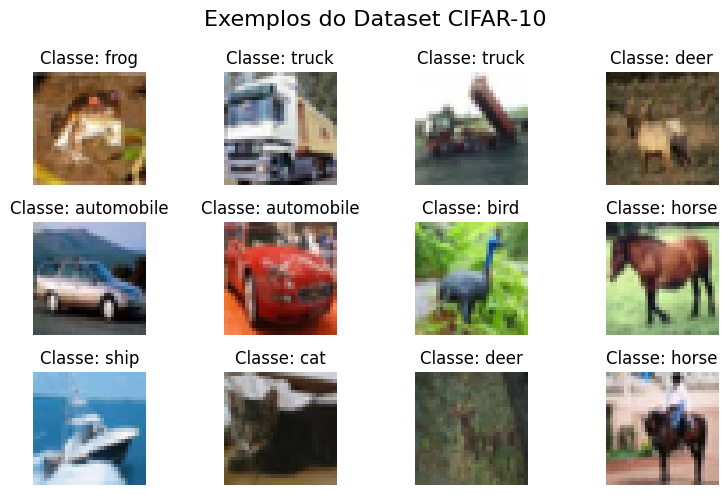

In [ ]:
# Dicionário com nomes das classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar 12 imagens do conjunto de treino
plt.figure(figsize=(8, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Classe: {class_names[y_train[i][0]]}")
    plt.axis('off')

plt.suptitle("Exemplos do Dataset CIFAR-10", fontsize=16)
plt.tight_layout()
plt.show()

#### 5. Criar o modelo

In [ ]:
# Criar modelo
model = Sequential([
    Input(shape=(3072,)),
    Dense(512, activation='relu'),
    LayerNormalization(),
    Dropout(0.1),

    Dense(256, activation='relu'),
    LayerNormalization(),
    Dropout(0.1),

    Dense(128, activation='relu'),
    LayerNormalization(),
    Dropout(0.1),

    Dense(10, activation='softmax')
])

#### 6. Copilar modelo

In [ ]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 512)            │         1,024 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 256)            │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,740,682 (6.64 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

#### 7. Treinar o modelo

In [ ]:
history = model.fit(x_train_flat, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.1647 - loss: 2.3193 - val_accuracy: 0.3122 - val_loss: 1.8906
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.3066 - loss: 1.8982 - val_accuracy: 0.3344 - val_loss: 1.8147
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.3415 - loss: 1.8160 - val_accuracy: 0.3930 - val_loss: 1.7053
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.3677 - loss: 1.7599 - val_accuracy: 0.3882 - val_loss: 1.6946
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.3809 - loss: 1.7179 - val_accuracy: 0.4168 - val_loss: 1.6193
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.3982 - loss: 1.6736 - val_accuracy: 0.4192 - val_loss: 1.6082
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4116 - loss: 1.6377 - val_accuracy: 0.4356 - val_loss: 1.5913
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4170 - loss: 1.6211 - 

#### 8. Testar o modelo

In [ ]:
loss, acc = model.evaluate(x_test_flat, y_test_cat)

print(f'Acurácia no conjunto de teste: {acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4631 - loss: 1.4873
Acurácia no conjunto de teste: 0.4619


#### 9. Mostrar 10 imagens corretamente e 10 incorretamente classificadas

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


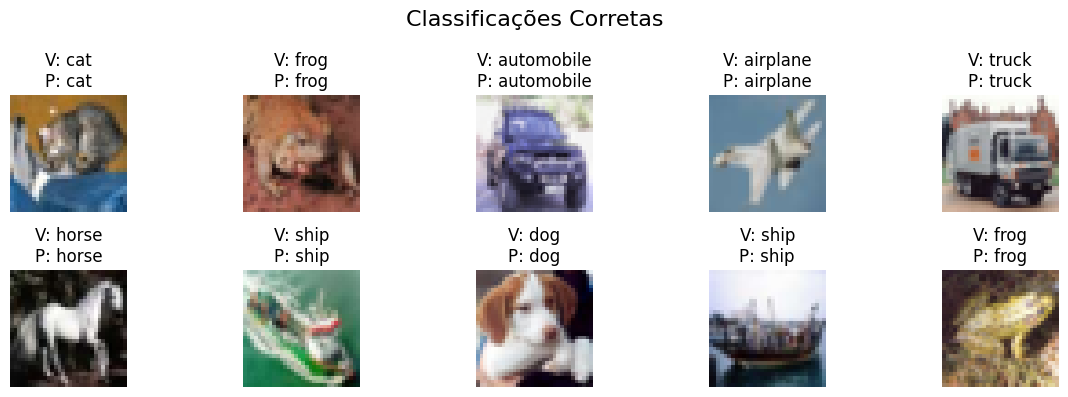

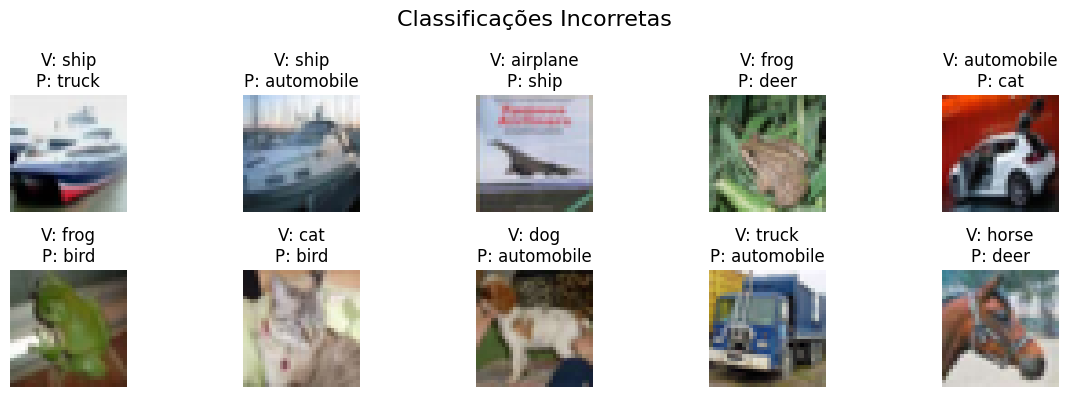

In [ ]:
# Fazer predições no conjunto de teste
predictions = model.predict(x_test_flat)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

# Identificar acertos e erros
acertos = np.where(predicted_classes == true_classes)[0]
erros = np.where(predicted_classes != true_classes)[0]

# Dicionário com nomes das classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Função para plotar imagens
def mostrar_imagens(indices, titulo):
    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(indices[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[idx])
        plt.title(f"V: {class_names[true_classes[idx]]}\nP: {class_names[predicted_classes[idx]]}")
        plt.axis('off')
    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()

# Mostrar imagens corretamente classificadas
mostrar_imagens(acertos, "Classificações Corretas")

# Mostrar imagens incorretamente classificadas
mostrar_imagens(erros, "Classificações Incorretas")